In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline

data=pd.read_pickle('AQI-FE1-Binarized.pkl')
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','RH','AH','T','NOx(GT)']].copy(deep=True)
dx.sort_index(inplace=True)

In [2]:
#'nighthours','peakNoActivity','earlymorning'
peakhours=[8,9,10,11,17,18,19,20]
dx['peakhours']=data['HourofDay'].apply(lambda x: 1 if x in peakhours else 0)
nighthours=[11,0,1,2]#nighthours
dx['nighthours']=data['HourofDay'].apply(lambda x: 1 if x in nighthours else 0)
peakNoActivity=[3,4,5]
dx['peakNoActivity']=data['HourofDay'].apply(lambda x: 1 if x in peakNoActivity else 0)
earlymorning=[6,7]
dx['earlymorning']=data['HourofDay'].apply(lambda x: 1 if x in earlymorning else 0)

In [3]:
#data['Friday']=data['Friday'].apply(lambda x: 1 if x==4 else 0)
minmaxlist=[]
for x1 in dx.columns:
    minmaxlist.append([x1,dx[x1].min(),dx[x1].max()])
    dx[x1]=dx[x1].apply(lambda x: (x-dx[x1].min())/(dx[x1].max()-dx[x1].min()))

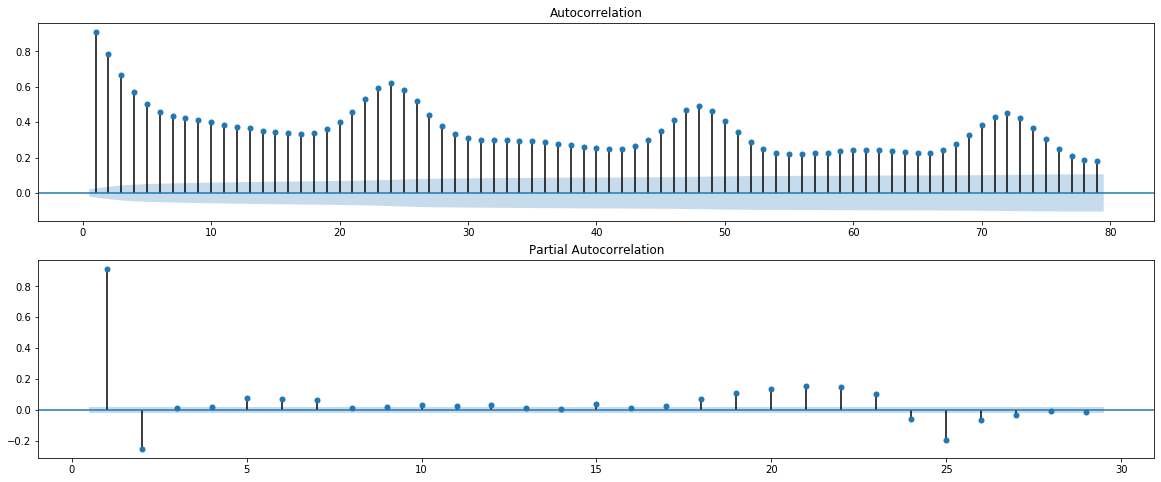

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=[20,8])
plt.subplot(211)
plot_acf(dx['NOx(GT)'].values, ax=plt.gca(),lags=range(1,80))
plt.subplot(212)
plot_pacf(dx['NOx(GT)'].values, ax=plt.gca(),lags=range(1,30))
plt.show()

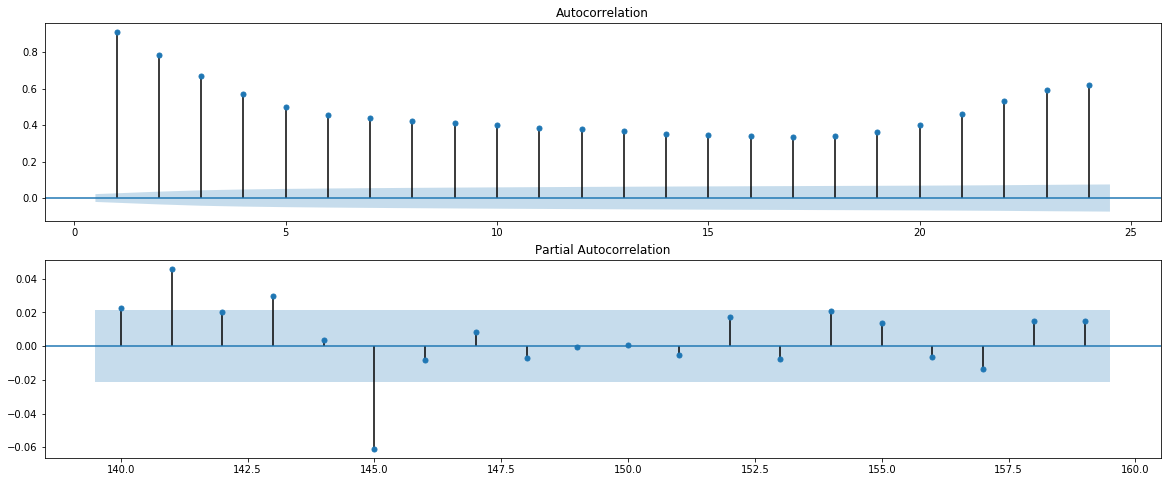

In [5]:
plt.figure(figsize=[20,8])
plt.subplot(211)
plot_acf(dx['NOx(GT)'].values, ax=plt.gca(),lags=range(1,25))
plt.subplot(212)
plot_pacf(dx['NOx(GT)'].values, ax=plt.gca(),lags=range(140
                                                        ,160))
plt.show()

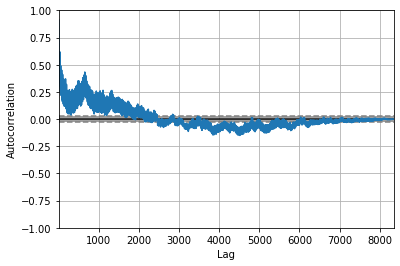

In [6]:

from pandas.plotting import autocorrelation_plot,lag_plot
autocorrelation_plot(dx['NOx(GT)'])

In [7]:
dx['shift-1']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=1)
dx['shift-2']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=2)
dx['shift-5']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=5)
#dx['shift-3']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=3)
dx['shift-6']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=6)
dx['shift-7']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=7)
#dx['shift-9']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=9)
dx['shift-10']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=10)
dx['shift-12']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=12)
#dx['shift-13']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=13)
#dx['shift-14']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=14)
dx['shift-15']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=15)
#dx['shift-16']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=16)
dx['shift-17']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=17)
dx['shift-18']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=18)
dx['shift-19']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=19)
dx['shift-20']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=20)
dx['shift-21']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=21)
dx['shift-22']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=22)
dx['shift-23']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=23)
dx['shift-24']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=24)
dx['shift-25']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=25)
dx['shift-26']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=26)
dx['shift-27']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=27)
dx['shift-44']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=44)
dx['shift-45']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=45)
dx['shift-46']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=46)
dx['shift-47']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=47)
#dx['shift-48']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=48)
dx['shift-49']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=49)
dx['shift-50']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=50)
dx['shift-59']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=59)
dx['shift-68']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=68)
dx['shift-69']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=69)
dx['shift-70']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=70)
dx['shift-71']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=71)
dx['shift-73']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=73)
dx['shift-74']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=74)
dx['shift-84']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=84)
dx['shift-93']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=93)
dx['shift-94']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=94)
dx['shift-95']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=95)
dx['shift-96']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=96)
dx['shift-108']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=108)
dx['shift-111']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=111)
dx['shift-118']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=118)
dx['shift-121']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=121)
dx['shift-141']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=141)
dx['shift-143']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=143)
dx['shift-145']=dx['NOx(GT)'].loc[:'2005-3-1'].shift(periods=145)
#dx['shift-145']=dx['T'].loc[:'2005-3-1'].shift(periods=145)
#dx['diff']=dx['NOx(GT)'].loc[:'2005-3-1']-dx['shift-1'].loc[:'2005-3-1']


In [8]:
train=dx.loc[:'2005-3-1'].copy(deep=True)
train.dropna(inplace=True)
test=dx.loc['2005-3-2':].copy(deep=True)

In [9]:
txdx=dx['NOx(GT)'].loc[:'2005-3-1']-dx['shift-1'].loc[:'2005-3-1']


In [10]:
dx['NOx(GT)'].loc[:'2005-3-1']

2004-03-04 00:00:00    0.063729
2004-03-04 01:00:00    0.046780
2004-03-04 02:00:00    0.044068
2004-03-04 03:00:00    0.041017
2004-03-04 04:00:00    0.037966
                         ...   
2005-03-01 19:00:00    0.490847
2005-03-01 20:00:00    0.440000
2005-03-01 21:00:00    0.342373
2005-03-01 22:00:00    0.185085
2005-03-01 23:00:00    0.178983
Name: NOx(GT), Length: 7734, dtype: float64

In [11]:
#attb=['rolling-72','rolling-48','rolling-24','rolling-12']
attb=[ 'RH','AH','T',
    'HourofDay',
        'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
RM = lm.LinearRegression()
#RM.fit(train[attb],train['NOx(GT)'])
RM.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
test['peakhours']

2005-03-02 00:00:00    0.0
2005-03-02 01:00:00    0.0
2005-03-02 02:00:00    0.0
2005-03-02 03:00:00    0.0
2005-03-02 04:00:00    0.0
                      ... 
2005-04-04 10:00:00    1.0
2005-04-04 11:00:00    1.0
2005-04-04 12:00:00    0.0
2005-04-04 13:00:00    0.0
2005-04-04 14:00:00    0.0
Name: peakhours, Length: 615, dtype: float64

In [13]:
window=train['NOx(GT)'].loc["2005-2-20":].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],
        #test['Month'].loc[x],
         #test['DayofMonth'].loc[x],
         test['HourofDay'].loc[x],test['Monday'].loc[x],
         test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
         test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
        window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],window[-15],window[-18],
         window[-19],window[-20],window[-21],window[-22],window[-23],window[-24],window[-25],
         window[-26],window[-27],window[-44],window[-45],window[-46],window[-47],window[-49],
         window[-50],window[-59],window[-68],window[-69],window[-70],window[-71],window[-73],
         window[-74],test['peakhours'].loc[x],test['nighthours'].loc[x],
         test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]
        ]
    
    pred=RM.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

#train['T'].loc["2005-2-27":]

In [14]:
collist=[ 'RH','AH','T',
    'HourofDay',
        'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
         ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours','nighthours',
         'peakNoActivity','earlymorning',
         'Prediction']
prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index

In [15]:
test['shift-1']=prediction['shift-1'].copy(deep=True)
test['shift-2']=prediction['shift-2'].copy(deep=True)
#test['shift-3']=prediction['shift-3'].copy(deep=True)
test['Prediction']=prediction['Prediction'].copy(deep=True)

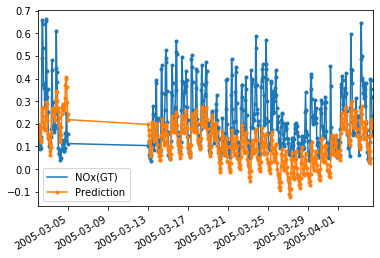

In [16]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax,style='.-')
test.plot(y='Prediction',ax=ax,style='.-')



In [17]:
test[['NOx(GT)','Prediction']].loc['2005-3-2':'2005-3-3']


,NOx(GT),Prediction
2005-03-02 00:00:00,0.161356,0.200356
2005-03-02 01:00:00,0.161356,0.194468
2005-03-02 02:00:00,0.127458,0.178369
2005-03-02 03:00:00,0.107797,0.157246
2005-03-02 04:00:00,0.088136,0.137732
2005-03-02 05:00:00,0.093559,0.117749
2005-03-02 06:00:00,0.128814,0.130669
2005-03-02 07:00:00,0.143729,0.184095
2005-03-02 08:00:00,0.490847,0.252579
2005-03-02 09:00:00,0.658305,0.273909


In [18]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-8'], test['Prediction'].loc['2005-3-2':'2005-3-8'])

0.02393923729830563

In [19]:
mean_squared_error(test['NOx(GT)'], test['Prediction'])

0.02169231905770697

In [20]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-8'], test['Prediction'].loc['2005-3-2':'2005-3-8'])

0.1285231829840453

In [21]:
r2_score(test['NOx(GT)'], test['Prediction'])

-0.26360829324457424

In [22]:
from fbprophet import Prophet


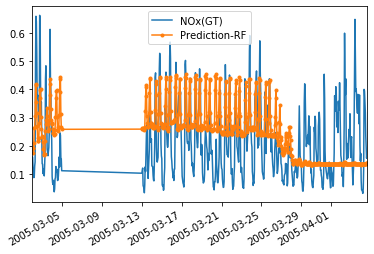

In [23]:
attb=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
reg2 = RandomForestRegressor(random_state=100, n_estimators=500,max_depth=10
                             ,oob_score=True)
reg2.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
window=train['NOx(GT)'].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],
        #test['Month'].loc[x],
         #test['DayofMonth'].loc[x],
         test['HourofDay'].loc[x],
         #test['Monday'].loc[x],
         #test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
         #test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
         window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],window[-15],window[-18],
         window[-19],window[-20],window[-21],window[-22],window[-23],window[-24],window[-25],
         window[-26],window[-27],window[-44],window[-45],window[-46],window[-47],window[-49],
         window[-50],window[-59],window[-68],window[-69],window[-70],window[-71],window[-73],
         window[-74],test['peakhours'].loc[x],test['nighthours'].loc[x],
         test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]
        ]
    
    pred=reg2.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
         ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
         'nighthours','peakNoActivity','earlymorning',
         'Prediction']
prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index
test['Prediction-RF']=prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax)
test.plot(y='Prediction-RF',ax=ax,style='.-')

In [24]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-RF'].loc['2005-3-2':'2005-3-2'])

0.021485402732914508

In [25]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-RF'].loc['2005-3-2':'2005-3-2'])

0.39254743541833603

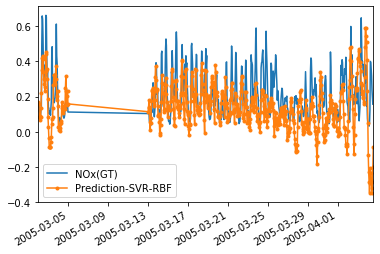

In [49]:
from sklearn.svm import SVR
attb=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
#reg3 = SVR(kernel='rbf', C=1000, gamma=0.3, epsilon=.01)
reg3= SVR(kernel='poly', C=100, gamma='auto', degree=7, epsilon=.1, coef0=1)
reg3.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
window=train['NOx(GT)'].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],test['HourofDay'].loc[x],
         window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],
         window[-15],window[-18],window[-19],window[-20],window[-21],window[-22],window[-23],
         window[-24],window[-25],window[-26],window[-27],window[-44],window[-45],window[-46],
         window[-47],window[-49],window[-50],window[-59],window[-68],window[-69],window[-70],
         window[-71],window[-73],window[-74],test['peakhours'].loc[x],
         test['nighthours'].loc[x],test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]]
    #test['Month'].loc[x],
    #test['DayofMonth'].loc[x],
    #test['Monday'].loc[x],
    #test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
    #test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
    
    pred=reg3.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist=[ 'RH','AH','T','HourofDay','shift-1','shift-2','shift-5',
         'shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
         'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24',
         'shift-25','shift-26','shift-27','shift-44','shift-45','shift-46','shift-47',
         'shift-49','shift-50','shift-59','shift-68','shift-69','shift-70','shift-71',
         'shift-73','shift-74','peakhours','nighthours','peakNoActivity','earlymorning',
         'Prediction']

prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index
test['Prediction-SVR-RBF']=prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax)
test.plot(y='Prediction-SVR-RBF',ax=ax,style='.-')

In [50]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-SVR-RBF'].loc['2005-3-2':'2005-3-2'])

0.01311963322602006

In [51]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-SVR-RBF'].loc['2005-3-2':'2005-3-2'])

0.6290711908644955

In [68]:
from sklearn.neural_network import MLPRegressor
attb=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
reg4= MLPRegressor(hidden_layer_sizes=(70,30,70),learning_rate_init=0.01,
                                 early_stopping=True,iter=500)
reg4.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
window=train['NOx(GT)'].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],test['HourofDay'].loc[x],
         window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],
         window[-15],window[-18],window[-19],window[-20],window[-21],window[-22],window[-23],
         window[-24],window[-25],window[-26],window[-27],window[-44],window[-45],window[-46],
         window[-47],window[-49],window[-50],window[-59],window[-68],window[-69],window[-70],
         window[-71],window[-73],window[-74],test['peakhours'].loc[x],
         test['nighthours'].loc[x],test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]]
    #test['Month'].loc[x],
    #test['DayofMonth'].loc[x],
    #test['Monday'].loc[x],
    #test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
    #test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
    
    pred=reg4.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist=[ 'RH','AH','T','HourofDay','shift-1','shift-2','shift-5',
         'shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
         'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24',
         'shift-25','shift-26','shift-27','shift-44','shift-45','shift-46','shift-47',
         'shift-49','shift-50','shift-59','shift-68','shift-69','shift-70','shift-71',
         'shift-73','shift-74','peakhours','nighthours','peakNoActivity','earlymorning',
         'Prediction']

prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index
test['Prediction-MLP']=prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax)
test.plot(y='Prediction-MLP',ax=ax,style='.-')

TypeError: __init__() got an unexpected keyword argument 'iter'

In [65]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-MLP'].loc['2005-3-2':'2005-3-2'])


0.08199746733961795

In [66]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-MLP'].loc['2005-3-2':'2005-3-2'])

-1.3182982624917945

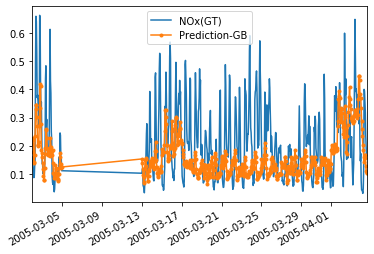

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
attb=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
reg5= HistGradientBoostingRegressor(max_iter=100,random_state=100)
reg5.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
window=train['NOx(GT)'].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],test['HourofDay'].loc[x],
         window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],
         window[-15],window[-18],window[-19],window[-20],window[-21],window[-22],window[-23],
         window[-24],window[-25],window[-26],window[-27],window[-44],window[-45],window[-46],
         window[-47],window[-49],window[-50],window[-59],window[-68],window[-69],window[-70],
         window[-71],window[-73],window[-74],test['peakhours'].loc[x],
         test['nighthours'].loc[x],test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]]
    #test['Month'].loc[x],
    #test['DayofMonth'].loc[x],
    #test['Monday'].loc[x],
    #test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
    #test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
    
    pred=reg5.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist=[ 'RH','AH','T','HourofDay','shift-1','shift-2','shift-5',
         'shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
         'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24',
         'shift-25','shift-26','shift-27','shift-44','shift-45','shift-46','shift-47',
         'shift-49','shift-50','shift-59','shift-68','shift-69','shift-70','shift-71',
         'shift-73','shift-74','peakhours','nighthours','peakNoActivity','earlymorning',
         'Prediction']

prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index
test['Prediction-GB']=prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax)
test.plot(y='Prediction-GB',ax=ax,style='.-')

In [33]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-GB'].loc['2005-3-2':'2005-3-2'])



0.024130699984783358

In [34]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-GB'].loc['2005-3-2':'2005-3-2'])

0.31775746663330207

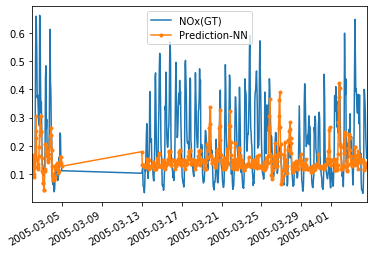

In [35]:
from sklearn import neighbors
attb=[ 'RH','AH','T',
    'HourofDay',
        #'Monday', 'Tuesday', 'Wednesday',
       #'Thursday', 'Friday', 'Saturday', 'Sunday',
    'shift-1'
      ,'shift-2','shift-5','shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
      'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24','shift-25','shift-26',
      'shift-27','shift-44','shift-45','shift-46','shift-47','shift-49','shift-50','shift-59',
      'shift-68','shift-69','shift-70','shift-71','shift-73','shift-74','peakhours',
      'nighthours','peakNoActivity','earlymorning'
     ]
reg6= neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
reg6.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
window=train['NOx(GT)'].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['RH'].loc[x],test['AH'].loc[x],test['T'].loc[x],test['HourofDay'].loc[x],
         window[-1],window[-2],window[-5],window[-6],window[-7],window[-10],window[-12],
         window[-15],window[-18],window[-19],window[-20],window[-21],window[-22],window[-23],
         window[-24],window[-25],window[-26],window[-27],window[-44],window[-45],window[-46],
         window[-47],window[-49],window[-50],window[-59],window[-68],window[-69],window[-70],
         window[-71],window[-73],window[-74],test['peakhours'].loc[x],
         test['nighthours'].loc[x],test['peakNoActivity'].loc[x],test['earlymorning'].loc[x]]
    #test['Month'].loc[x],
    #test['DayofMonth'].loc[x],
    #test['Monday'].loc[x],
    #test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
    #test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],
    
    pred=reg6.predict(np.asarray([lst]).reshape(1,-45))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist=[ 'RH','AH','T','HourofDay','shift-1','shift-2','shift-5',
         'shift-6','shift-7','shift-10','shift-12','shift-15','shift-18',
         'shift-19','shift-20','shift-21','shift-22','shift-23','shift-24',
         'shift-25','shift-26','shift-27','shift-44','shift-45','shift-46','shift-47',
         'shift-49','shift-50','shift-59','shift-68','shift-69','shift-70','shift-71',
         'shift-73','shift-74','peakhours','nighthours','peakNoActivity','earlymorning',
         'Prediction']

prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index
test['Prediction-NN']=prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='NOx(GT)',ax=ax)
test.plot(y='Prediction-NN',ax=ax,style='.-')

In [36]:
mean_squared_error(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-NN'].loc['2005-3-2':'2005-3-2'])




0.04480394717823303

In [37]:
r2_score(test['NOx(GT)'].loc['2005-3-2':'2005-3-2'], test['Prediction-NN'].loc['2005-3-2':'2005-3-2'])

-0.26673318415880387